In [12]:
import yfinance as yf
import numpy as np
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt

In [17]:
# Fetch current price of TMUS
tmus = yf.Ticker("TMUS")
tmus_price = tmus.history(period="1d")['Close'].iloc[-1]
S0 = tmus_price

# Strike price for TMUS
K = 150  # approximated

# Calculate time to maturity for TMUS
today = datetime(2023, 11, 21)
expiration = datetime(2024, 5, 21)
T = (expiration - today).days / 365.0

# Fetch 5-year US Treasury bond yield for risk-free rate
treasury = yf.Ticker("^FVX")
r = treasury.history(period="1d")['Close'].iloc[-1] / 100  # Convert to decimal

# Calculate volatility (sigma) using historical TMUS data
tmus_hist = tmus.history(period="10y")['Close']
returns = tmus_hist.pct_change().dropna()
sigma = np.std(returns) * np.sqrt(252)  # Annualized standard deviation

# Simulation parameters
N = 252  # Number of steps (trading days in a year)
M = 10000  # Number of simulations

# Print results
print(f"Current TMUS Price: ${S0:.2f}")
print(f"Strike Price (K): ${K:.2f}")
print(f"Time to Maturity (T): {T:.2f} years")
print(f"Risk-free Rate (r): {r:.2%}")
print(f"Volatility (sigma): {sigma:.2%}")

Current TMUS Price: $148.91
Strike Price (K): $150.00
Time to Maturity (T): 0.50 years
Risk-free Rate (r): 4.44%
Volatility (sigma): 27.78%


In [18]:
# Monte Carlo simulation
np.random.seed(0)  # For reproducibility
Z = np.random.standard_normal((N, M))  # Random normal values
price_paths = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * (T/N) + sigma * np.sqrt(T/N) * Z, axis=0))
ST = price_paths[-1]

# Calculate payoffs for call and put options
payoff_call = np.maximum(ST - K, 0)
payoff_put = np.maximum(K - ST, 0)

# Discount payoffs to present value
PV_call = np.exp(-r * T) * payoff_call
PV_put = np.exp(-r * T) * payoff_put

# Calculate option prices
call_price = np.mean(PV_call)
put_price = np.mean(PV_put)

print(f"Estimated Call Option Price for TMUS: ${call_price:.2f}")
print(f"Estimated Put Option Price for TMUS: ${put_price:.2f}")

Estimated Call Option Price for TMUS: $12.53
Estimated Put Option Price for TMUS: $10.28


In [19]:
# Black-Scholes-Merton formula for TMUS
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be either 'call' or 'put'")
    
    return option_price

# Calculate option prices using Black-Scholes for TMUS
tmus_call_price_bs = black_scholes(S0, K, T, r, sigma, option_type='call')
tmus_put_price_bs = black_scholes(S0, K, T, r, sigma, option_type='put')

print(f'Black-Scholes Call Option Price for TMUS: ${tmus_call_price_bs:.2f}')
print(f'Black-Scholes Put Option Price for TMUS: ${tmus_put_price_bs:.2f}')

Black-Scholes Call Option Price for TMUS: $12.68
Black-Scholes Put Option Price for TMUS: $10.48


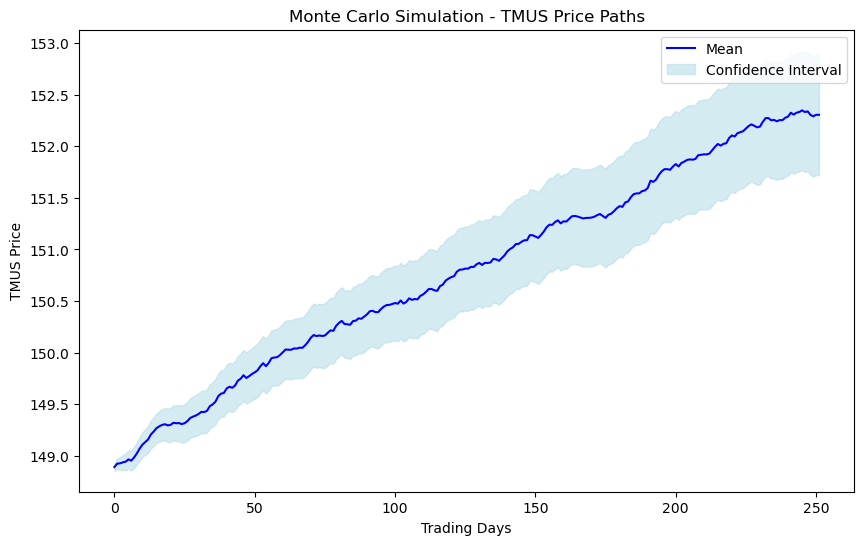

In [22]:
# Monte Carlo simulation for TMUS
np.random.seed(0)  # For reproducibility
z = np.random.standard_normal((N, M))  # Random normal values
price_paths = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * (T/N) + sigma * np.sqrt(T/N) * z, axis=0))

# Calculate mean and confidence interval
mean_price = np.mean(price_paths, axis=1)
confidence_interval = 1.96 * np.std(price_paths, axis=1) / np.sqrt(M)

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean
plt.plot(mean_price, label='Mean', color='blue')

# Fill between upper and lower bounds of the confidence interval
plt.fill_between(range(N), mean_price - confidence_interval, mean_price + confidence_interval, color='lightblue', alpha=0.5, label='Confidence Interval')

plt.title('Monte Carlo Simulation - TMUS Price Paths')
plt.xlabel('Trading Days')
plt.ylabel('TMUS Price')

# Show legend
plt.legend()

plt.show()


Simulated Option Price: 25.74


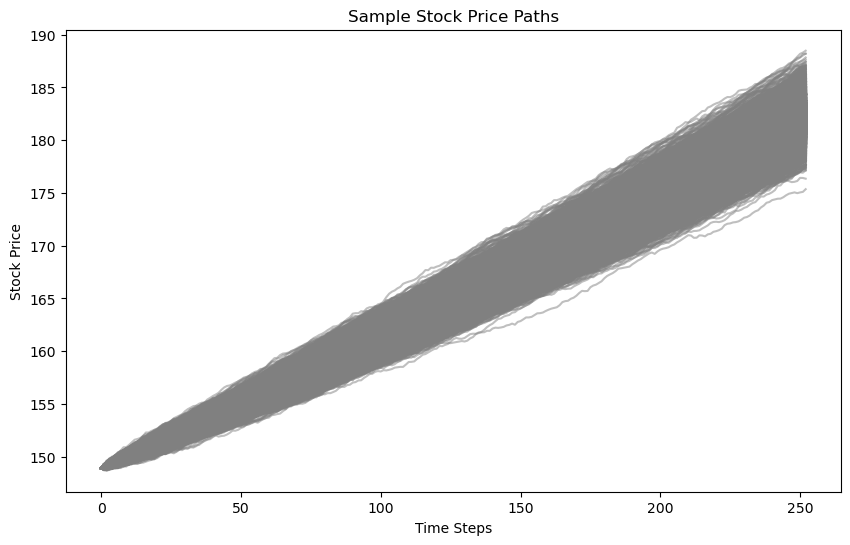

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Option parameters
S0 = 148.91  # Initial stock price
K = 150  # Strike price
r = 0.44  # Risk-free rate
T = 0.5     # Time to maturity (in years)
sigma = 0.275  # Volatility

# Simulation parameters
num_simulations = 10000
num_steps = 252  # Number of trading days in a year
dt = T / num_steps

# Generate random normal samples for each simulation and each time step
dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

# Initialize arrays to store stock prices
stock_prices = np.zeros((num_simulations, num_steps + 1))
stock_prices[:, 0] = S0

# Perform Monte Carlo simulation to generate stock price paths
for i in range(1, num_steps + 1):
    stock_prices[:, i] = stock_prices[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dW[:, i - 1])

# Calculate option payoffs
call_payoffs = np.maximum(stock_prices[:, -1] - K, 0)

# Discount the payoffs to present value
call_prices = np.exp(-r * T) * call_payoffs

# Calculate the simulated option price and its mean
simulated_option_price = np.mean(call_prices)
print(f"Simulated Option Price: {simulated_option_price:.2f}")

# Plot some sample stock price paths
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.T, color='gray', alpha=0.5)
plt.title('Sample Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()


Simulated Option Price: 25.74


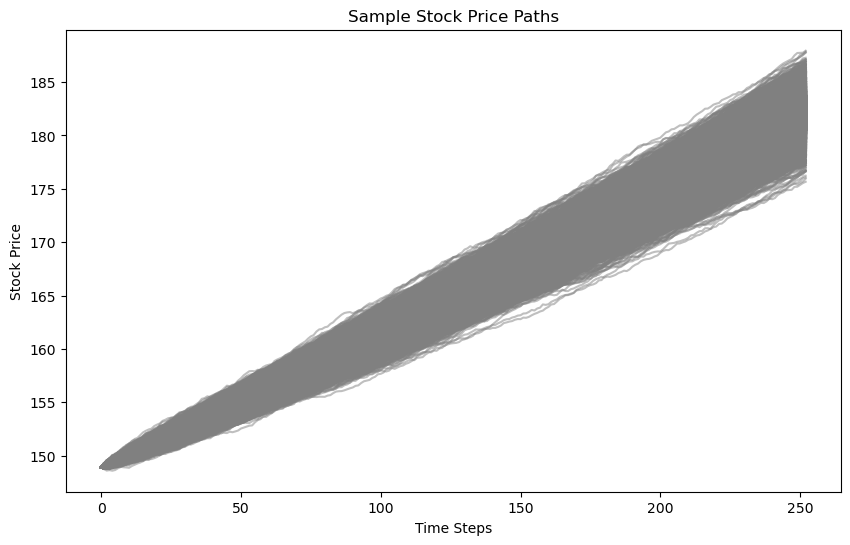

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Option parameters
S0 = 148.91  # Initial stock price
K = 150  # Strike price
r = 0.44  # Risk-free rate
T = 0.5     # Time to maturity (in years)
sigma = 0.275  # Volatility

# Simulation parameters
num_simulations = 10000
num_steps = 252  # Number of trading days in a year
dt = T / num_steps

# Generate random normal samples for each simulation and each time step
dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

# Initialize arrays to store stock prices
stock_prices = np.zeros((num_simulations, num_steps + 1))
stock_prices[:, 0] = S0

# Perform Monte Carlo simulation to generate stock price paths
for i in range(1, num_steps + 1):
    stock_prices[:, i] = stock_prices[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dW[:, i - 1])

# Calculate option payoffs
call_payoffs = np.maximum(stock_prices[:, -1] - K, 0)

# Discount the payoffs to present value
call_prices = np.exp(-r * T) * call_payoffs

# Calculate the simulated option price and its mean
simulated_option_price = np.mean(call_prices)
print(f"Simulated Option Price: {simulated_option_price:.2f}")

# Plot some sample stock price paths
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.T, color='gray', alpha=0.5)
plt.title('Sample Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()
